In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Create moon dataset
X, y = make_moons(n_samples=10000, noise=0.1, random_state=42)

In [ ]:
X[0:5]

array([[ 0.45549318, -0.12550304],
       [-0.70421731,  0.04130827],
       [ 0.41379864,  0.79132194],
       [-0.86404873,  0.13875386],
       [-0.93626767,  0.35926737]])

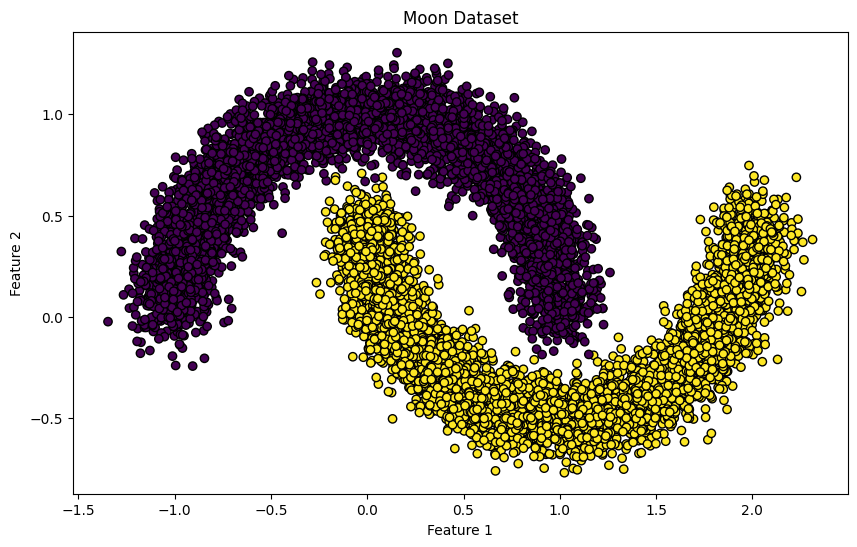

In [ ]:
# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolor='k')
plt.title("Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[-0.05239099, -0.74545067],
       [-1.383186  , -0.41381752],
       [-0.10023646,  1.07726476],
       [-1.5665963 , -0.22008852],
       [-1.64946923,  0.21830853]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

X_train.shape :  (8000, 2)
X_test.shape :  (2000, 2)
y_train.shape :  (8000,)
y_test.shape :  (2000,)


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Model_relu

In [ ]:
model_relu =  Sequential()


model_relu.add(Dense(16,activation='relu',input_dim=2))
model_relu.add(Dense(32,activation='relu'))
model_relu.add(Dense(1,activation='sigmoid'))

model_relu.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_relu.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history=model_relu.fit(X_train,y_train,batch_size=16,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8296 - loss: 0.3679 - val_accuracy: 0.9335 - val_loss: 0.1720
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9303 - loss: 0.1598 - val_accuracy: 0.9915 - val_loss: 0.0448
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0367 - val_accuracy: 0.9980 - val_loss: 0.0143
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0135 - val_accuracy: 0.9985 - val_loss: 0.0075
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0077 - val_accuracy: 0.9985 - val_loss: 0.0050
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9985 - val_loss: 0.0036
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 0.9985 - val_loss: 0.0030
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


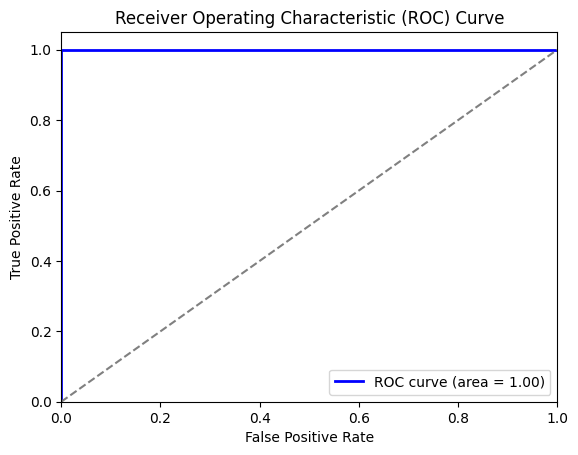

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_relu.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

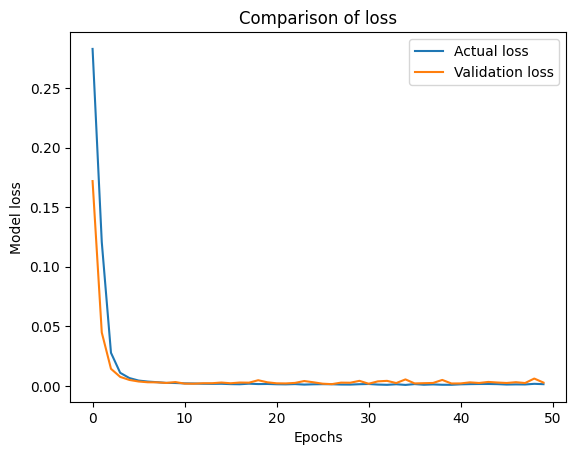

In [ ]:
plt.plot(history.history['loss'], label='Actual loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

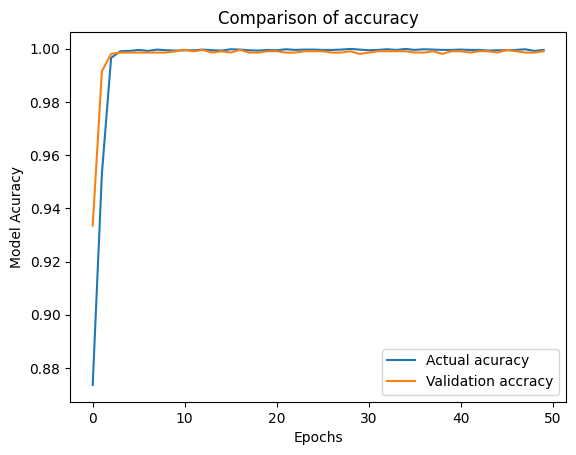

In [ ]:
plt.plot(history.history['accuracy'], label='Actual acuracy')
plt.plot(history.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()

In [ ]:
# Evaluate the model on test data
loss, accuracy = model_relu.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9997 - loss: 8.3145e-04
Test Loss: 0.0027
Test Accuracy: 0.9990


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU

model_prelu = Sequential()

model_prelu.add(Dense(16, input_dim=2))
model_prelu.add(PReLU())  # Adding PReLU activation

model_prelu.add(Dense(32))
model_prelu.add(PReLU())  # Adding PReLU activation

model_prelu.add(Dense(1, activation='sigmoid'))

model_prelu.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 16)                  │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 32)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_prelu.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history1=model_relu.fit(X_train,y_train,batch_size=16,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 6.2010e-04 - val_accuracy: 0.9985 - val_loss: 0.0020
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 8.8555e-04 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 6.4667e-04 - val_accuracy: 0.9990 - val_loss: 0.0034
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 7.7867e-04 - val_accuracy: 0.9985 - val_loss: 0.0038
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 9.2139e-04 - val_accuracy: 0.9985 - val_loss: 0.0036
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 7.4969e-04 - val_accuracy: 0.9990 - val_loss: 0.0033
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 7.0284e-04 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - los

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


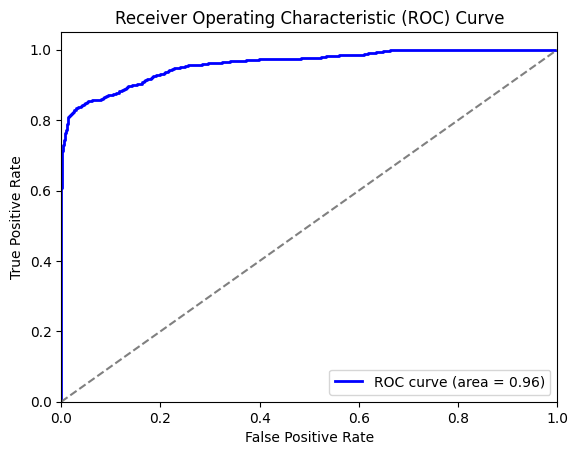

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_prelu.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

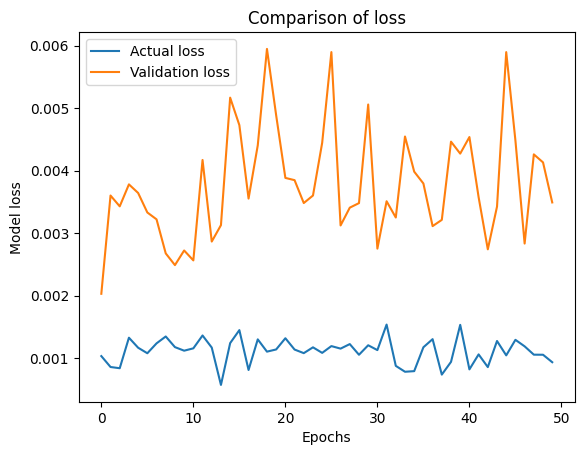

In [ ]:
plt.plot(history1.history['loss'], label='Actual loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

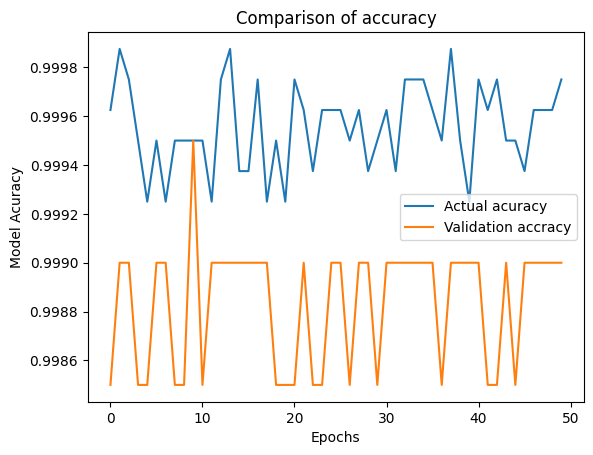

In [ ]:
plt.plot(history1.history['accuracy'], label='Actual acuracy')
plt.plot(history1.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()

In [ ]:
from tensorflow.keras.layers import PReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm

model_prelu = Sequential()

# Add a dense layer followed by PReLU with custom parameters
model_prelu.add(Dense(16, input_dim=2))
model_prelu.add(PReLU(alpha_initializer='he_normal',
                      alpha_regularizer=l2(0.001),
                      alpha_constraint=max_norm(1.0)))

model_prelu.add(Dense(32))
model_prelu.add(PReLU())  # Default PReLU

model_prelu.add(Dense(1, activation='sigmoid'))

model_prelu.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_4 (PReLU)                    │ (None, 16)                  │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_5 (PReLU)                    │ (None, 32)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_prelu.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history1=model_relu.fit(X_train,y_train,batch_size=16,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0013 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 8.8922e-04 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 6.2710e-04 - val_accuracy: 0.9985 - val_loss: 0.0052
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 6.8886e-04 - val_accuracy: 0.9990 - val_loss: 0.0038
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 4.0456e-04 - val_accuracy: 0.9990 - val_loss: 0.0072
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 4.8164e-0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


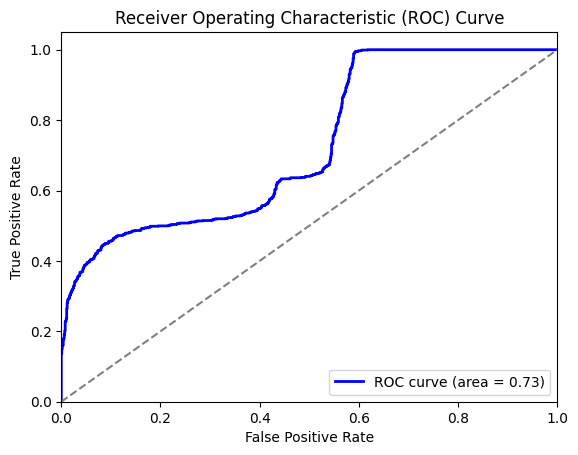

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_prelu.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()